# Prepared By:
* Sara Hesham Hassan
* Tasneem Mohamed Saad
* Mahmoud Mohamed Taha
* Wssam Hassan Ibrahim
* Mohammed Abdulnaser Abdulfattah
* Mohammad Jamal Hanafy

    Grop05, Nasr City

In [1]:
class stack:
    def __init__(self,size=100):
        self.size=size
        self.counter=0
        self.element=[]

    def add(self,val):
        if self.counter<self.size:
            self.element.append(val)
            self.counter+=1
        else:
            print("queue is full.")
    def pop(self):
        if self.counter>0:
            return self.element[-1]
    def remove(self):
        if self.counter>0:
            self.counter-=1
            self.element.remove(self.element[-1])
    
    def isempty(self):
        return self.counter == 0
          

In [2]:
class queue:
    def __init__(self,size=100):
        self.values=[]
        self.size=size
        self.curr_size=0
    
    def is_full (self):
        return (self.size == self.curr_size)
    
    def is_empty(self):
        return (self.curr_size==0)
    
    def enqueue(self,data):
        if not self.is_full():
            self.values.append(data)
            self.curr_size+=1
        
    def dequeue(self):
        if not self.is_empty():
            self.curr_size-=1
            return self.values.pop(0)
    
    def peek(self):
        if not self.is_empty():
            return self.values[0]
        
    def __str__(self):
        return "Queue = {}".format(self.values)
            


In [3]:
class DFS:
    def __init__(self,graph):
        self.graph = graph
        self.all_connected_components = []
        
    def Solve_DFS(self,index=0):
        visited=[]
        stck = stack(self.graph.number_of_nodes)
        connected_commponent=[]

        visited.append(index)
        stck.add(index)

        while not stck.isempty():
            current_node = stck.pop()
            stck.remove()
            connected_commponent.append(current_node)

            if index < self.graph.number_of_nodes:
                index += 1

            else:
                return 

            for neighbour in self.graph.adj[current_node]:
                if neighbour not in visited:
                    visited.append(neighbour)
                    stck.add(neighbour)
        self.all_connected_components.append(connected_commponent)
        return self.Solve_DFS(index)
    
    def get_connected_components(self):
        return self.all_connected_components


In [4]:
class BFS:
    def __init__(self, graph, l):
        self.graph = graph
        self.l = l
    
    def Solve_BFS(self):
        Graph = self.l
        frontier = queue()
        visited = []
        connected = []
        list_of_lists = []

        for index in range(len(Graph)):
            if not (index in visited):
                frontier.enqueue(index)
                while frontier.is_empty() == False:
                    node=frontier.dequeue()
                    if not (node in visited):
                        visited.append(node)
                        connected.append(node)
                    for child in Graph[node]:
                        if not (child in visited):
                            frontier.enqueue(child)
                    #print(visited)
                #print("The connected Nodes are {}".format(connected))
                list_of_lists.append(connected)
                connected =[]

        return list_of_lists

In [5]:
class Disjoint:
    def __init__(self,graph):
        self.graph = graph
        
    class Subset:
            def __init__(self, parent, rank):
                self.parent = parent
                self.rank = rank

    def set_parent(self,subsets, node):
        if subsets[node].parent != node:
            subsets[node].parent = self.set_parent(subsets, subsets[node].parent)
        return subsets[node].parent

    def union(self,subsets, parent1, parent2):
        if subsets[parent1].rank > subsets[parent2].rank:
            subsets[parent2].parent = parent1
        elif subsets[parent2].rank > subsets[parent1].rank:
            subsets[parent1].parent = parent2
        else:
            subsets[parent1].rank += 1
            subsets[parent2].parent = parent1 

    def connected_comp_by_disjoint(self):
        subsets = []
        for u in range(self.graph.number_of_nodes):
            subsets.append(self.Subset(u, 0))

        for u in range(len(self.graph.adj)):
            u_per = self.set_parent(subsets, u)
            for v in self.graph.adj[u]:
                v_per = self.set_parent(subsets, v)
                self.union(subsets, u_per, v_per)
        connected_components = {}
        v = 0
        for _subset in subsets:
            if  _subset.parent not in connected_components:
                connected_components[_subset.parent] = [v]
            else:
                connected_components[_subset.parent].append(v)
            v += 1
        return list(connected_components.values())


In [6]:
class Partitioning:
    def __init__(self,graph, l):
        self.graph = graph
        self.l = l
    
    def Solve_Partionning(self):

        ip = self.l
        graph = dict()

        for i in range(len(ip)):
            e = ip[i]
            graph[i] = e

        All_cc = []

        nodes = []
        for k in graph:
            nodes.append(k)

        while len(nodes) != 0:
            pivot_index = 0
            pivot = nodes[pivot_index]
            connected = True

            while connected:
                connected = False
                for i in range(nodes.index(pivot)+1, len(nodes)):
                    if nodes.index(pivot) == 0:        
                        if nodes[i] in graph[pivot]:
                            nodes.insert(0, nodes[i])
                            del(nodes[i+1])
                            pivot_index +=1
                            connected = True
                            break

                    else:
                        for j in range(0, nodes.index(pivot)):
                            if nodes[i] in graph[nodes[j]]:
                                nodes.insert(0, nodes[i])
                                del(nodes[i+1])
                                pivot_index +=1
                                connected = True
                                break


            cc = nodes[0:pivot_index+1]
            All_cc.append(cc)
            del(nodes[0:pivot_index+1])


        return All_cc
        
    

In [7]:
class Graph:
    def __init__(self,number_of_nodes):
        self.number_of_nodes = number_of_nodes
        self.adj = [[] for i in range(number_of_nodes)]
        
    def get_adj(self):
        return self.adj
    
    def addEdge(self, node1, node2):
        try:
            if node1 not in self.adj[node2]:
                self.adj[node1].append(node2)
                self.adj[node2].append(node1)
                return True
        except IndexError:
            print("You have Entered node number larger than your graph size please be carful")
            
        return False


In [8]:
class connectedComponentsSolver:
    
    def __init__(self,algorithm,graph,l):
        self.algorithm = algorithm
        self.graph = graph
        self.l = l
        self.all_connected_components = self.solve()
        
        
    def solve(self):
        if self.algorithm == 'dfs':
            dfs = DFS(self.graph)
            dfs.Solve_DFS()
            return dfs.get_connected_components()
            
        elif self.algorithm == 'disjoint':
            ds = Disjoint(self.graph)
            return ds.connected_comp_by_disjoint()
        
        elif self.algorithm == 'bfs':
            #bfs = BFS(self.graph, self.l)
            bfs = BFS(self.graph, self.l)
            bfs_solved = bfs.Solve_BFS()
            return bfs_solved
        
        elif self.algorithm == 'partitioning':
            part = Partitioning(self.graph, self.l)
            return part.Solve_Partionning()
            
            
    def largest_connected_component(self):
        #largest = max(self.all_connected_components, key=len)
        #return largest
        lengthes = list(map(len,self.all_connected_components))
        return self.all_connected_components[lengthes.index(max(lengthes))]
    

Welcome

Please choose how you want to enter the graph
 (1 for copy paste the graph as a list of lists) or (2 for inputting the graph node by node):
5
Please choose how you want to enter the graph
 (1 for copy paste the graph as a list of lists) or (2 for inputting the graph node by node):
1
Please copy paste the graph as a list of lists:
 


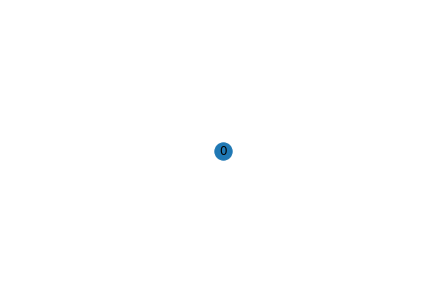

Please enter the algoritm number to solve the problem with >>
(1 for DFS) or (2 for BFS)
(3 for disjoint) or (4 for partitioning)
1
Largest Connected Component =
[0]
please choose what do you want to do:
         to Make New Graph >> /new 
         to change The approach for solving the problem >> /change
         to close the program please enter >> /exit

Value Error >>> please enter Valid command 
/change
Please enter the algoritm number to solve the problem with >>
(1 for DFS) or (2 for BFS)
(3 for disjoint) or (4 for partitioning)
[[], [2, 3], [1, 4], [1, 4], [2, 3], [7], [8], [5, 8, 10], [7, 6, 9], [8], [7, 12], [12], [10, 11, 13, 14, 15],          [12, 23],[12],[12, 16],[15, 17, 18],[16],[16, 19, 20],[18],[18, 21],[20, 22, 24],[21, 23],[13, 22],[21, 25, 26],          [24],[24],[29],[29],[27, 28, 32],[31],[30, 32, 33],[29, 31, 33],[31, 32, 34],[33, 35],[34, 36],[35]]
Value Error >>> please enter the algoritm number correctly

(1 for DFS) or (2 for BFS)
(3 for disjoint) or (4 for 

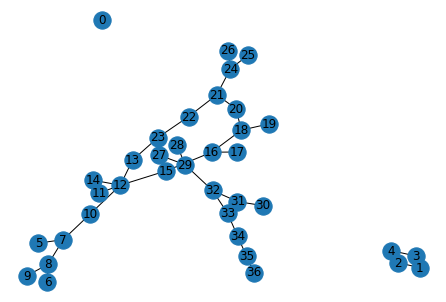

Please enter the algoritm number to solve the problem with >>
(1 for DFS) or (2 for BFS)
(3 for disjoint) or (4 for partitioning)
3
Largest Connected Component =
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
please choose what do you want to do:
         to Make New Graph >> /new 
         to change The approach for solving the problem >> /change
         to close the program please enter >> /exit
/change
Please enter the algoritm number to solve the problem with >>
(1 for DFS) or (2 for BFS)
(3 for disjoint) or (4 for partitioning)
4
Largest Connected Component =
[11, 6, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 10, 9, 8, 7, 5]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

    
class Menu_For_Cc:

    def __init__(self):
        print('Welcome\n')
    
    def show_menu(self):
        while True:
            menu = ['/new','/change','/exit']
            choose = input('please choose what do you want to do:\n \
        to Make New Graph >> /new \n \
        to change The approach for solving the problem >> /change\n \
        to close the program please enter >> /exit\n').strip().lower()
            flag = False
            while not flag:
                if choose not in menu:
                    choose = input('Value Error >>> please enter Valid command \n').strip().lower()
                else:
                    flag = True
            if choose == '/new':
                ipType = self.input_type()
                if ipType == 1:
                    self.graph = self.input_to_graph()
                else:
                    self.graph = self.make_graph()
                self.draw(self.graph)
                plt.show()
                plt.clf()
                mode = self.choose_mode()
                cc = connectedComponentsSolver(mode,self.graph,self.graph.get_adj())
                print(f'Largest Connected Component =\n{cc.largest_connected_component()}')
            elif choose =='/change':
                mode = self.choose_mode()
                cc = connectedComponentsSolver(mode,self.graph,self.graph.get_adj())
                print(f'Largest Connected Component =\n{cc.largest_connected_component()}')
            else:
                print('GoodBye')
                break    
            
    def input_type(self):
        while True:
            try:
                ip_type = int(input("Please choose how you want to enter the graph\n (1 for copy paste the graph as a list of lists) or (2 for inputting the graph node by node):\n"))
            except:
                print('Value Error >>> how you want to enter the graph correctly\n')
            else:
                if ip_type == 1 or ip_type == 2:
                    break
        return ip_type
    
    def make_graph(self):
        while True:
            try:
                graph_number_of_nodes =int(input('Please enter the number of nodes in your graph\n').strip())
            except:
                print('Value Error >>> please enter the number of nodes in your graph correctly\n')
            else:
                break
        graph = Graph(graph_number_of_nodes)
        
        node = input('Please Enter the edges in your graph each per line\nin the following format:>> \n\
        source      destination\nexample:\n 1 0 \nthat\'s mean there is an edge from node 1 to node 0 and vise versa\n\
after finishing please enter /finish\n')
        while True:
            if node == '/finish':
                break
            try:
                node0,node1 = map(int, node.split())
            except:
                print(f'Value Error >>> Expect two space separated numbers but gets >> {node}')
            else:
                graph.addEdge(node0,node1)
            node = input()
        return graph
    
    def input_to_graph(self):
        while True:
            try:
                ip = input('Please copy paste the graph as a list of lists:\n ')
            except:
                print('Value Error >>> please enter graph correctly\n')
            else:
                break
        
        ip = ip.replace(" ", "")
        ip = ip[1:-1]
        ip = ip.split("],")
        op = []
        for g in ip:
            entry = []
            g = g.replace('[', "")
            g = g.replace(']', "")
            if len(g) == 0:
                op.append(entry)
                continue
            g = g.split(',')
            
            for n in g:
                entry.append(int(n))
            op.append(entry)
            
        
        graph_number_of_nodes = len(op)
        graph = Graph(graph_number_of_nodes)

        for i in range(graph_number_of_nodes):
            e = op[i]
            if len(e) > 0:
                for j in e:
                    graph.addEdge(i,j)

        return graph
         
    
    def draw(self,_graph):
        graph = {}
        for i in range(len(_graph.adj)):
            graph[i] = _graph.adj[i]
        shape = nx.Graph(graph)
        nx.draw(shape, with_labels = True)    
        
        
    def choose_mode(self):
        modes = ['dfs', 'bfs','disjoint', 'partitioning'] 
        
        while True:
            try:
                m = int(input("Please enter the algoritm number to solve the problem with >>\n"+
                              "(1 for DFS) or (2 for BFS)\n(3 for disjoint) or (4 for partitioning)\n"))
            except: 
                m = int(input('Value Error >>> please enter the algoritm number correctly\n'+
                              "\n(1 for DFS) or (2 for BFS)\n(3 for disjoint) or (4 for partitioning)\n"))
            if (m == 1 or m == 2 or m == 3 or m == 4):
                self.mode = modes[m-1]
                break

                        
        return self.mode
    
    def Start(self):
        ipType = self.input_type()
        if ipType == 1:
            self.graph = self.input_to_graph()
        else:
            self.graph = self.make_graph()
        self.draw(self.graph)
        plt.show()
        plt.clf()
        mode = self.choose_mode()
        cc = connectedComponentsSolver(mode,self.graph,self.graph.get_adj())
        print(f'Largest Connected Component =\n{cc.largest_connected_component()}')
        

    
if __name__ == "__main__":
    prog = Menu_For_Cc()
    prog.Start()
    prog.show_menu()